# CNN Classification

In [163]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout
from keras.layers import MaxPooling2D,Flatten
from keras.callbacks import ModelCheckpoint,TensorBoard

## Loading data

In [39]:
cd = os.getcwd()

In [20]:
Xtrain = pd.read_csv('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Deep Learning\\Xtrain_data.cvs')
ytrain = pd.read_csv('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Deep Learning\\ytrain.cvs')
Xtest = pd.read_csv('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Deep Learning\\Xtest_data.cvs')
ytest = pd.read_csv('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Deep Learning\\ytest.cvs')

Data augmentation????

## Preparing the training matrix

In [42]:
Xtrain.loc[0][2]

'C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Final_Images\\melanoma mimic\\Filtered_mim_15.jpg'

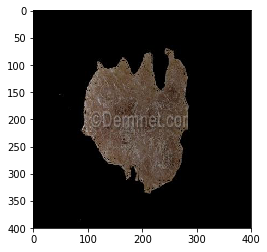

In [126]:
im = mpimg.imread(Xtrain.loc[0][2])
plt.figure
plt.imshow(im)

In [184]:
Xtrain_feat = []
Xtest_feat = []

for filename in Xtrain.values:
    im_temp = mpimg.imread(filename[2])
    Xtrain_feat.append(im_temp)
    
for filename in Xtest.values:
    im_temp = mpimg.imread(filename[2])
    Xtest_feat.append(im_temp)

In [180]:
#Number of classes 
n = 7

#One hot label encoder
enc = LabelEncoder()
enc.fit(np.arange(1,n+1))
enc.transform(np.arange(1,n+1))
train_labels = enc.transform(np.array(ytrain)[:,1].astype(int))
train_labels = np_utils.to_categorical(train_labels)

## Building the model

In [181]:
model = Sequential()
                 
model = Sequential()
# Add a 2D convolution layer, the kernel size is 5*5, activation function
# is relu and the output feature is 32
model.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),padding='same',
                 activation='relu',input_shape=(400,400,3)))
# Max pooling operation, pool size is 2*2, strides is 2*2
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
#Add a 2D convolution layer, the kernel size is 5*5, activation function
#is relu and the output feature is 64
model.add(Conv2D(64,kernel_size=(5,5),strides=(1,1),padding='same',
                 activation='relu'))
# Max pooling operation, pool size is 2*2, strides is 2*2
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
# Flatten the input
model.add(Flatten())
# Add a fully connected layer whose output dims is 1024, and activation
# function is relu
model.add(Dense(1024,activation='relu'))
# Apply dropout, 0.5 of the input units to drop
model.add(Dropout(rate=0.5))
# Add a fully connected layer whose output dims is 10, and activation
# function is softmax
model.add(Dense(n,activation='softmax'))
# Using adam to optimize and learning rate is 1e-4
adam = keras.optimizers.Adam(lr = 1e-4)

# Configure the learning process, loss function is 
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer=adam,
             metrics=['accuracy'])

batch_size = 50
epoch = 10

# the filepath to save best model
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',mode='max',
                            save_best_only=True,verbose=1)

tensorboard = TensorBoard(log_dir="./logs3",
                          write_images=True,batch_size=batch_size)
callback_list = [checkpoint,tensorboard]

In [185]:
Xtrain_feat.shape

AttributeError: 'list' object has no attribute 'shape'

In [174]:
# Train the model
H = model.fit(Xtrain_feat,train_labels,
             batch_size=batch_size,epochs = epoch,verbose=1,
             callbacks=callback_list,validation_split=0.20)

ValueError: Error when checking input: expected conv2d_8_input to have 4 dimensions, but got array with shape (865, 1, 400, 400, 3)

In [176]:
Xtrain_feat

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0